# Simulado 2 - Programação Estruturada

Lembre-se de comentar bem seu código!


## Uma introdução ao Aprendizado de Máquina

O Aprendizado de Máquina é um subcampo da inteligência artificial que se concentra no desenvolvimento de algoritmos e técnicas que permitem aos computadores aprender a partir de dados, sem serem explicitamente programados. O objetivo é permitir que os computadores reconheçam padrões nos dados e façam previsões ou decisões com base nesses padrões.

Existem três principais tipos de aprendizado de máquina: **Supervisionado**, **Não Supervisionado** e **Por Reforço**. Vamos nos consentrar aqui no **Supervisionado**

Nesse tipo de aprendizado, o algoritmo é treinado em um conjunto de dados que possui entradas e as respostas desejadas correspondentes (rótulos). O objetivo é aprender uma função que mapeie as entradas para as saídas corretas.

Imagine que você quer treinar um algoritmo para classificar animais com base em suas caracteristicas. Vocẽ pode escolher atributos como a presença de pelos ou penas, comportamento, número de patas, tamanho, etc. Tendo uma base de dados bem construida com as caracteristicas e a respectiva categoria do animal, podemos usá-la para a classificação de novos dados!


### Conhecendo o KNN

O algoritmo k-Nearest Neighbors (KNN) é um método de classificação simples e poderoso usado em machine learning para a classificação de objetos com base em exemplos de treinamento que são próximos a eles no espaço de características.

O KNN é um tipo de aprendizado baseado em instância, o que significa que ele não aprende explicitamente um modelo durante a fase de treinamento. Em vez disso, ele memoriza todos os dados de treinamento e faz previsões para novos pontos de dados com base na similaridade com pontos de dados previamente vistos.

<center>
<br>
<img width=600 src="https://miro.medium.com/v2/resize:fit:1400/0*GPaI5OjY4Y8DW4he" >
</center>

## Construindo um KNN

Neste simulado, seu objetivo é construir um KNN e realizar a classificação de dados aleatórios gerados por você. Haverão funções de plotagem auxiliares para que seja possível visualizar todo o processo do algoritmo.

Imagine que iremos construir o KNN para classificar pontos em um plano cartesiano. Dado um novo ponto $(x,y)$, quero saber qual a provavel cor associada a ele (0,1 ou 2)

**Tarefa 1:** Construa uma função que gere uma base de dados aleatória. Ela deverá receber um número de pontos e retornará duas listas, uma guardará as coordenadas $(x, y)$ de cada ponto e a outra a categoria de cor correspondente. As coordenadas devem ser valores **reais** e o intervalo pode ser escolhido por você.

**Dica:** Lembre da biblioteca random do python e das funções `random.random()` e `random.randint()`

```python
# Exemplo da estrutura dos valores de saída
# dados
[(1.3358629869178873, 3.3186222758486386),
 (2.1975112906241945, 1.2155703357877168),
 (1.4581214519174712, 1.6929708117677533),
 (7.044531806375291, 3.811417413325252),
 ...
]
# categorias
[1, 2, 0, 1, 1, 2, ...]
```

In [ ]:
# Crie sua função aqui
from random import random, randint

def gerar_dados(n_dados):
  dados = []
  categorias = []

  for _ in range(n_dados):
    dados.append((random()*10, random()*10))
    categorias.append(randint(0,2))

  return dados, categorias

dados, categorias = gerar_dados(100)

Execute a célula com o código de plotagem abaixo para ver a distribuição dos seus pontos


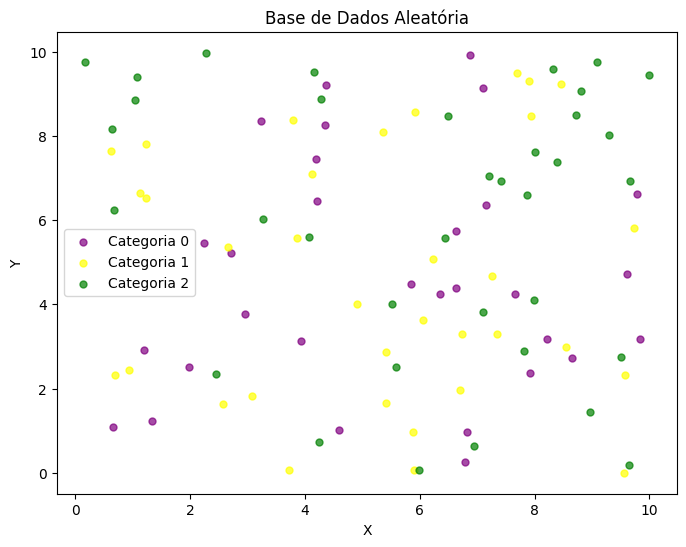

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plota_dados(dados, categorias):
    plt.figure(figsize=(8, 6))
    dados = np.array(dados)
    cores = ['purple', 'yellow', 'green']
    for categoria in np.unique(categorias):
      idx = categorias == categoria
      plt.scatter(dados[idx, 0], dados[idx, 1], c=cores[categoria],
                  label=f'Categoria {categoria}', s=25, alpha=0.7)
    plt.xlabel('X')
    plt.ylabel('Y')

# Descomente essas linhas antes de executar
plota_dados(dados, categorias)
plt.title('Base de Dados Aleatória')
plt.legend()
plt.show()

**Tarefa 2:** Para o KNN, precisamos de um função que calcule a distância entre dois dados (pontos). Faça essa função usando a distância euclidiana:

$$d(p,q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2}$$


Você pode adicionar exemplos pra mostrar que sua função está funcionando corretamente!

In [ ]:
# Crie sua função aqui
from math import sqrt

def distancia_euclidiana(ponto1, ponto2):
  return sqrt((ponto1[0] - ponto2[0])**2 + (ponto1[1] - ponto2[1])**2)

distancia_euclidiana((1,0), (0,1))

1.4142135623730951

**Tarefa 3:** Finalmente, construa a função de classificação do KNN.

**Entrada:** base de dados (dados e predição gerados) e conjunto de novos pontos para classificação

**Processamento:**
- para cada ponto no conjunto de pontos, faça:
    - calcule a distância euclidiana desse ponto para todos os da _base de dados_
    - selecione os **K** pontos da base de dados como a menor distãncia calculada. Estes serão so vizinhos mais próximos
    - classifique o novo ponto com a categoria mais frequente (moda) entre os **K** pontos selecionados

**Saída:** Lista contendo as categorias encontradas para os novos pontos

**Observações:** O valor de **K** pode ser escolhido por você. Recomendo um valor baixo, como 3, 5, 7 ou 10. Você pode estilizar os resultados de saída com prints para melhor visualização dos resultados

**Dicas:**
- Você pode usar a função `sorted` do python para ordenar com base nas menores distâncias (https://www.w3schools.com/python/ref_func_sorted.asp)
- Como as distâncias, os pontos e as categorias estarão em listas diferentes, você pode juntar elas de alguma forma ou usar os valores dos indices como meio de conexão
- Lembre-se do fatiamento de listas do python `lista[inicio:fim]`
- Você provavelmente já fez uma função de **cálculo de moda** em outra atividade, sinta-se a vontade para utilizá-la


In [ ]:
# Crie sua função aqui
from statistics import mode

def knn(dados, categorias, novos_pontos, k):

  classificacoes = []
  for ponto in novos_pontos:
    distancias = []

    # Loop sobre cada ponto dos dados
    for i in range(len(dados)):
      distancias.append((distancia_euclidiana(ponto, dados[i]), i))

    distancias.sort()

    k_vizinhos = distancias[:k]

    classificacao = []

    for vizinho in k_vizinhos:
      indice = vizinho[1]
      classificacao.append(categorias[indice])

    classificacoes.append(mode(classificacao))

  return classificacoes


# Esses pontos são exemplos para teste
# Você pode criar os seus próprio ou usar os que estão aqui
novos_pontos = [(1.3358629869178873, 3.3186222758486386),
 (2.1975112906241945, 1.2155703357877168),
 (1.4581214519174712, 1.6929708117677533),
 (7.044531806375291, 3.811417413325252),
 (0.31686490376336196, 1.7141331788013159),
 (9.695328407698815, 5.509804642725968),
 (1.0511134497464425, 8.588785129941716),
 (1.9797073299566759, 3.8070782378154933),
 (7.989100219799965, 0.5720707686011162),
 (2.674491711803065, 2.7417890586423335)]

In [ ]:
cat = knn(dados, categorias, novos_pontos, 5)

for i, ponto in enumerate(novos_pontos):

  print(f"X: {ponto[0]}, Y: {ponto[1]} | categoria = {cat[i]}")


X: 1.3358629869178873, Y: 3.3186222758486386 | categoria = 0
X: 2.1975112906241945, Y: 1.2155703357877168 | categoria = 1
X: 1.4581214519174712, Y: 1.6929708117677533 | categoria = 0
X: 7.044531806375291, Y: 3.811417413325252 | categoria = 1
X: 0.31686490376336196, Y: 1.7141331788013159 | categoria = 0
X: 9.695328407698815, Y: 5.509804642725968 | categoria = 0
X: 1.0511134497464425, Y: 8.588785129941716 | categoria = 2
X: 1.9797073299566759, Y: 3.8070782378154933 | categoria = 0
X: 7.989100219799965, Y: 0.5720707686011162 | categoria = 2
X: 2.674491711803065, Y: 2.7417890586423335 | categoria = 0


In [ ]:
lista = [(1,2), (3,4), (1,4), (2,3)]

lista.sort()

lista

[(1, 2), (1, 4), (2, 3), (3, 4)]

**Tarefa 4:** Vamos visualizar a classificação! Crie uma função semelhante a anterior, mas dessa vez ela vai receber um único ponto e retornar sua classficação e o **K-ésimo** valor de distância encontrado, ou seja, dentre os **K** pontos selecionados, quero o valor da distância do mais distante (como eles estão ordenados, só pegar o **K-ésimo**)

**Observações:** Você pode escolher as coordenadas desse novo ponto, mas lembre-se de estar no intervalo que você determinou no inicio!

Execute a segunda célula abaixo para visualizar a classificação desse ponto

In [ ]:
# Crie sua função aqui
from statistics import mode

def knn_unico(dados, categorias, ponto, k):

  distancias = []

  # Loop sobre cada ponto dos dados
  for i in range(len(dados)):
    distancias.append((distancia_euclidiana(ponto, dados[i]), i))

  distancias.sort()

  k_vizinhos = distancias[:k]

  classificacao = []

  for vizinho in k_vizinhos:
    indice = vizinho[1]
    classificacao.append(categorias[indice])

  return mode(classificacao), k_vizinhos[-1][0]

In [ ]:
ponto = (0.42, 7.48)

categoria, k_distancia = knn_unico(dados, categorias, ponto, 5)

print(f"Categoria: {categoria} | K-distancia: {k_distancia}")

Categoria: 1 | K-distancia: 1.2429731614648347


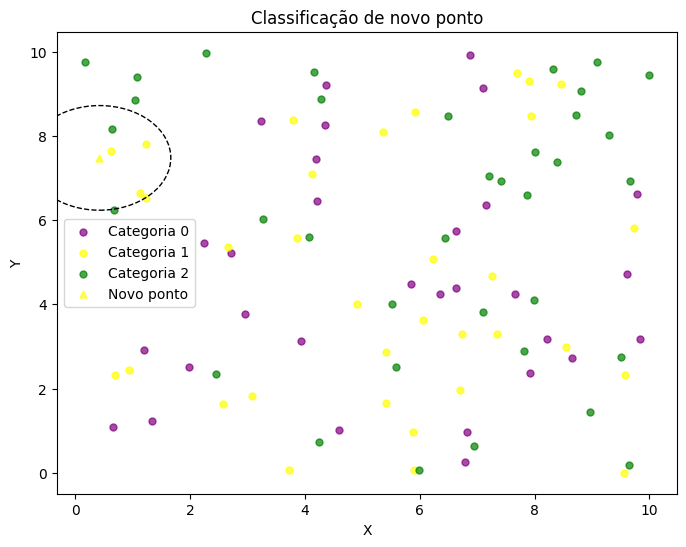

In [ ]:
# Visualizando a classificação

import numpy as np
import matplotlib.pyplot as plt

def visualizar_classificacao(dados, categorias, ponto, categoria, k_distancia):

  plota_dados(dados, categorias)
  cores =  ['purple', 'yellow', 'green']
  plt.scatter(ponto[0], ponto[1], c = cores[categoria],
              s=25, alpha=0.7, marker='^', label='Novo ponto')

  circle = plt.Circle(ponto, k_distancia, color='black',
                      fill=False, linestyle='--')
  plt.gca().add_artist(circle)

  plt.title("Classificação de novo ponto")
  plt.legend()
  plt.show()


# descomente antes de executar
visualizar_classificacao(dados, categorias, ponto, categoria, k_distancia)